In [1]:
import pickle

import pandas as pd
import statsmodels.api as sm
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
AUDIT_FEATURES = (
    'first_contentful_paint',
    'speed_index',
    'interactive',
    'first_meaningful_paint',
    'first_cpu_idle',
    'estimated_input_latency'
)

In [3]:
companies = pickle.load(open('combined.pkl', 'rb'))

In [4]:
companies.columns = [col_name.replace('-', '_') for col_name in companies.columns]

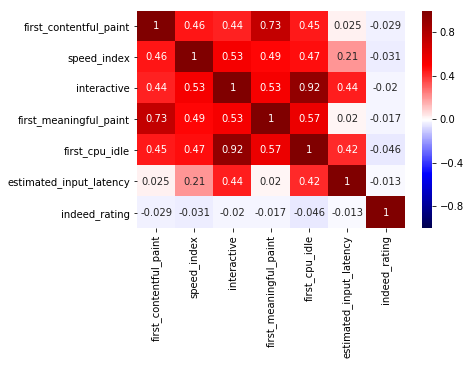

In [5]:
sns.heatmap(companies.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

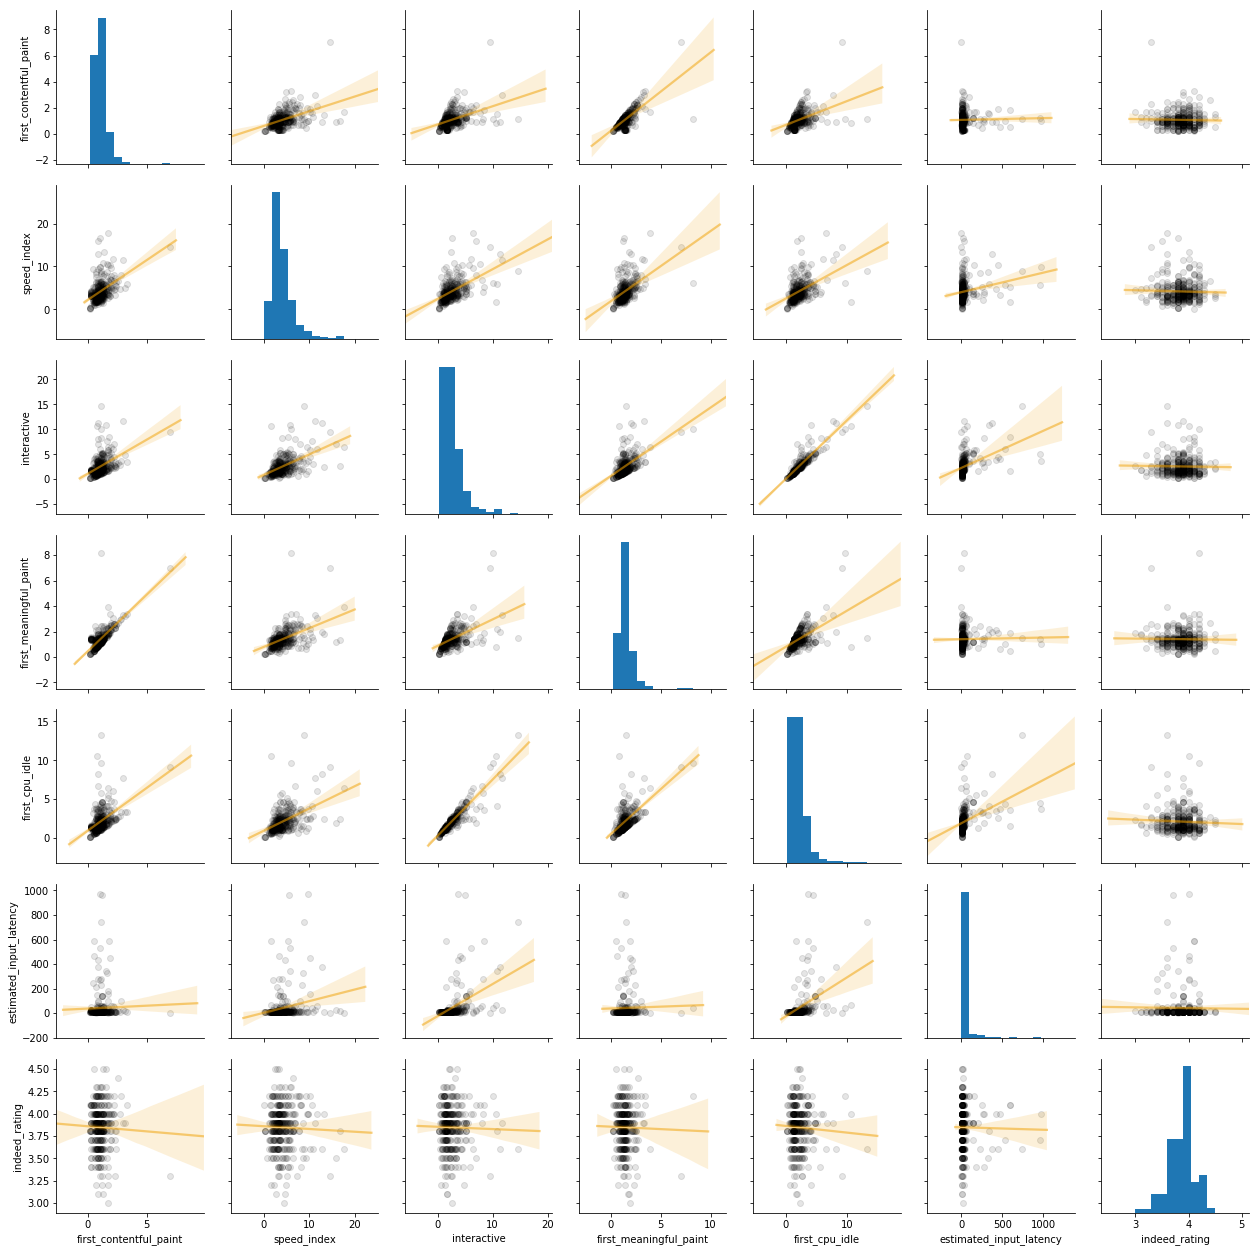

In [23]:
sns.pairplot(
    companies,
    kind='reg',
    plot_kws={
        'line_kws': {
            'alpha': 0.5,
            'color':'#f0a000'
        },
        'scatter_kws': {
            'alpha': 0.1,
            'color': '#000000'
        }
    }
);

In [7]:
X = companies[[*AUDIT_FEATURES]]
y = companies['indeed_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=131)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values);

In [8]:
skl_linear_model = LinearRegression()
skl_linear_model.fit(X_train_scaled, y_train)
skl_linear_model.score(X_test_scaled, y_test)

-0.06197593429292802

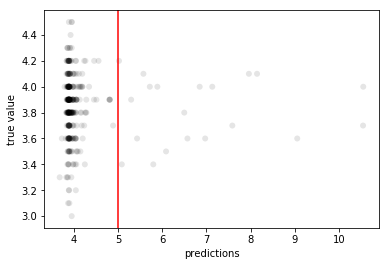

In [9]:
plt.scatter(
    skl_linear_model.predict(X),
    y,
    alpha=0.1,
    edgecolors='none',
    color='#000000'
)
plt.axvline(x=5, color='red')
plt.xlabel('predictions')
plt.ylabel('true value');

Text(0.5, 0, 'residuals')

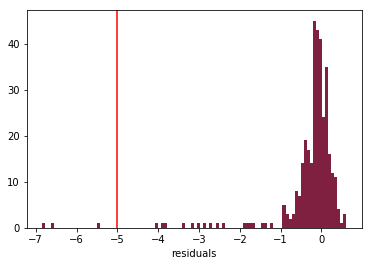

In [24]:
plt.hist(
    y - skl_linear_model.predict(X),
    bins=100,
    color='#802040'
)
plt.axvline(x=-5, color='red')
plt.xlabel('residuals')

In [31]:
noincep_skl_linear_model = LinearRegression(fit_intercept=False)
noincep_skl_linear_model.fit(X_train_scaled, y_train)
noincep_skl_linear_model.score(X_test_scaled, y_test)

-252.79494980617537

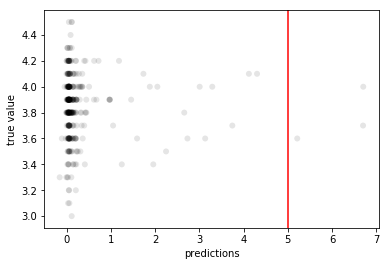

In [32]:
plt.scatter(
    noincep_skl_linear_model.predict(X),
    y,
    alpha=0.1,
    edgecolors='none',
    color='#000000'
)
plt.axvline(x=5, color='red')
plt.xlabel('predictions')
plt.ylabel('true value');

Text(0.5, 0, 'residuals')

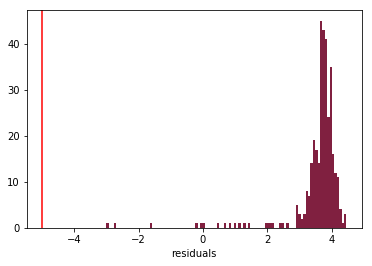

In [33]:
plt.hist(
    y - noincep_skl_linear_model.predict(X),
    bins=100,
    color='#802040'
)
plt.axvline(x=-5, color='red')
plt.xlabel('residuals')

In [11]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)
ridge_model.score(X_test_scaled, y_test)

-0.06155389116036236

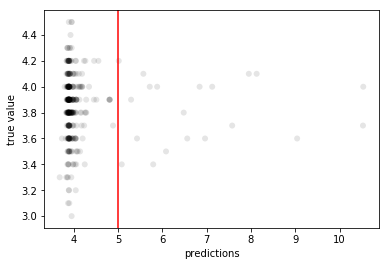

In [12]:
plt.scatter(
    ridge_model.predict(X),
    y,
    alpha=0.1,
    edgecolors='none',
    color='#000000'
)
plt.axvline(x=5, color='red')
plt.xlabel('predictions')
plt.ylabel('true value');

Text(0.5, 0, 'residuals')

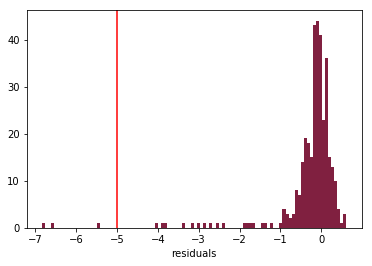

In [25]:
ridge_residuals = y - ridge_model.predict(X)

plt.hist(
    y - ridge_model.predict(X),
    bins=100,
    color='#802040'
)
plt.axvline(x=-5, color='red')
plt.xlabel('residuals')

In [14]:
d_matrix_train = X_train.copy()
d_matrix_train['indeed_rating'] = y_train

In [15]:
# statsmodel WITHOUT intercept terms:
sm_linear_model = sm.OLS(y_train, X_train)
sm_linear_fit = sm_linear_model.fit()
sm_linear_fit.rsquared

0.8086333237990496

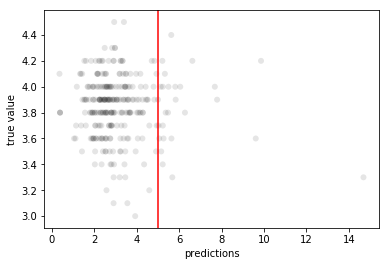

In [16]:
plt.scatter(
    sm_linear_fit.predict(X_train),
    y_train,
    alpha=0.1,
    edgecolors='none',
    color='#000000'
)
plt.axvline(x=5, color='red')
plt.xlabel('predictions')
plt.ylabel('true value');

/Users/lu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


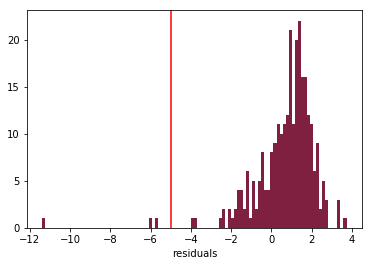

In [26]:
plt.hist(
    y - sm_linear_fit.predict(X_train),
    bins=100,
    color='#802040'
)
plt.axvline(x=-5, color='red')
plt.xlabel('residuals');

In [29]:
f'indeed_rating ~ {" + ".join(AUDIT_FEATURES)}'

'indeed_rating ~ first_contentful_paint + speed_index + interactive + first_meaningful_paint + first_cpu_idle + estimated_input_latency'

In [18]:
# statsmodel WITH terms:
patsy_y, patsy_X = patsy.dmatrices(
    f'indeed_rating ~ {" + ".join(AUDIT_FEATURES)}',
    data=d_matrix_train,
    return_type='dataframe'
)

sm_intercepted_linear_model = sm.OLS(patsy_y, patsy_X)
sm_intercepted_linear_fit = sm_intercepted_linear_model.fit()
sm_intercepted_linear_fit.rsquared

0.015541317921830444

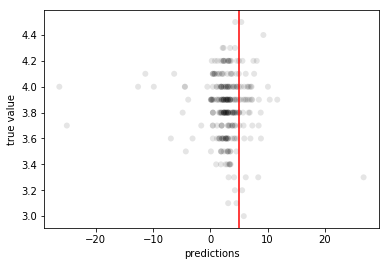

In [19]:
plt.scatter(
    sm_intercepted_linear_fit.predict(d_matrix_train),
    y_train,
    alpha=0.1,
    edgecolors='none',
    color='#000000'
)
plt.axvline(x=5, color='red')
plt.xlabel('predictions')
plt.ylabel('true value');

Text(0.5, 0, 'residuals')

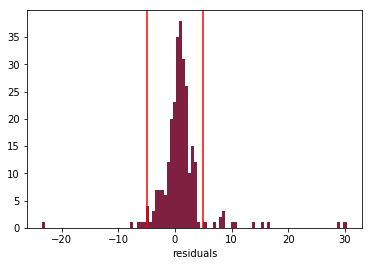

In [28]:
plt.hist(
    y - sm_intercepted_linear_fit.predict(d_matrix_train),
    bins=100,
    color='#802040'
)
plt.axvline(x=5, color='red')
plt.axvline(x=-5, color='red')
plt.xlabel('residuals')